# **Problem 2**
 Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment . Consider following example for better understanding Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events.
In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”. Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing how drop-off rate is, dropoff rate is defined as number of patients dropping off each month.
Then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”.

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading train data

In [4]:
train_df=pd.read_parquet("/content/sample_data/train.parquet")

Taking users who are all taking target drug

In [5]:
target_data = train_df[train_df['Incident'] == 'TARGET DRUG']

Calculate dropoff rate by month

In [6]:
target_data['Date'] = pd.to_datetime(target_data['Date'])
target_data['Month'] = target_data['Date'].dt.month
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

<ipython-input-6-cab66df57f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Date'] = pd.to_datetime(target_data['Date'])
<ipython-input-6-cab66df57f7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Month'] = target_data['Date'].dt.month


To visualize the drop off rate over time

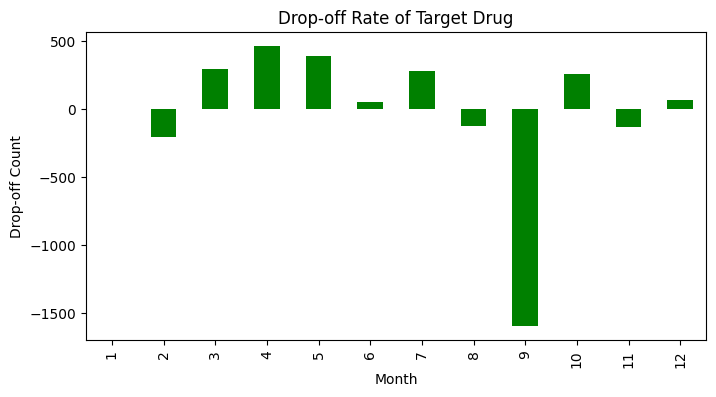

In [19]:
plt.figure(figsize = (8, 4))
dropoff_rates.plot(kind='bar', color = "green")
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug')
plt.show()

To analyze events driving dropp-off

In [8]:
dropoff_reasons = train_df[train_df['Patient-Uid'].isin(target_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

To calculate the frequency of each event leading to drop-off

In [9]:
event_freq = dropoff_reasons['Incident'].value_counts()

Plot the events leading to drop-off

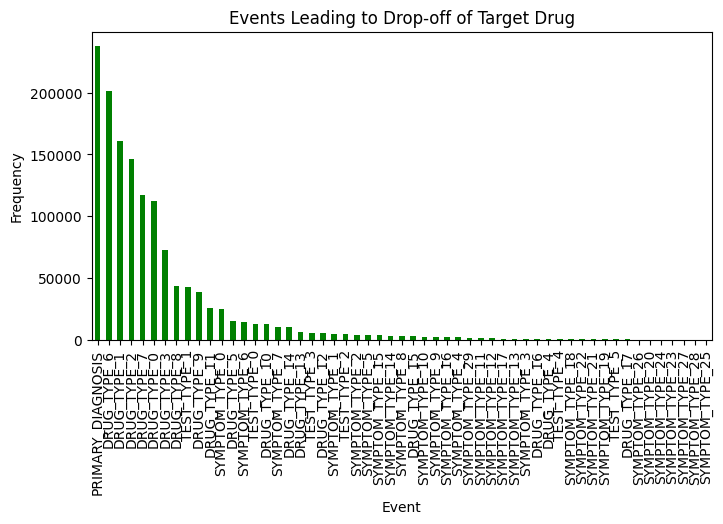

In [17]:
plt.figure(figsize=(8, 4))
event_freq.plot(kind='bar', color="green")
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()